![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/collab/Classifiers/NLU_Unsupervised_Keyword_Extraction_with_YAKE_Example.ipynb)
# Unsupervised keyword extraction with NLU using the YAKE algorithm

We can use the YAKE algorithm to extract keywords from text data.

Yake is an Unsupervised, Corpus-Independent, Domain and Language-Independent and Single-Document keyword extraction algorithm.

 Yake is a novel feature-based system for multi-lingual keyword extraction, which supports texts of different sizes, domain or languages. Unlike other approaches,  It follows an unsupervised approach which builds upon features extracted from the text, making it thus applicable to documents written in different languages without the need for further knowledge. This can be beneficial for a large number of tasks and a plethora of situations where access to training corpora is either limited or restricted.

 


# 1. Install Java and NLU

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null 

# 2. Load the Yake model and predict some sample keywords

In [ ]:
import nlu
sarcasm_pipe  = nlu.load('yake')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

,keywords_score_confidence,keywords,sentence
origin_index,,,
0,0.530936,"[gotta, give, halloween]",gotta love the teachers who give exams on the ...


3.1 Download sample dataset

In [ ]:
import pandas as pd
# Download the dataset 
! wget -N https://ckl-it.de/wp-content/uploads/2020/11/60kstackoverflow.csv -P /tmp
# Load dataset to Pandas
p = '/tmp/60kstackoverflow.csv'
df = pd.read_csv(p)
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


## 3.2 Predict on sample dataset
NLU expects a text column, thus we must create it from the column that contains our text data

In [ ]:
keyword_pipe  = nlu.load('yake')
keyword_predictions = sarcasm_pipe.predict(df['Title'])
keyword_predictions

,text,sentence,keywords_score_confidence,Title,keywords
origin_index,,,,,
0,Java: Repeat Task Every Random Seconds,Java: Repeat Task Every Random Seconds,0.268045,Java: Repeat Task Every Random Seconds,"[seconds, random seconds, every random seconds]"
1,Why are Java Optionals immutable?,Why are Java Optionals immutable?,0.579886,Why are Java Optionals immutable?,"[java, optionals, java optionals]"
2,Text Overlay Image with Darkened Opacity React...,Text Overlay Image with Darkened Opacity React...,0.268045,Text Overlay Image with Darkened Opacity React...,"[native, react native, opacity react native]"
3,Why ternary operator in swift is so picky?,Why ternary operator in swift is so picky?,0.749415,Why ternary operator in swift is so picky?,"[operator, swift, picky]"
4,hide/show fab with scale animation,hide/show fab with scale animation,0.749415,hide/show fab with scale animation,"[scale, animation, scale animation]"
...,...,...,...,...,...
44995,Convert List<String> to string C# - asp.net - ...,Convert List<String> to string C# - asp.net - ...,0.515845,Convert List<String> to string C# - asp.net - ...,"[convert, sql, sql server]"
44996,Does Python execute code from the top or botto...,Does Python execute code from the top or botto...,0.595741,Does Python execute code from the top or botto...,"[python, script, python execute]"
44997,how to change payment date in Azure?,how to change payment date in Azure?,0.749415,how to change payment date in Azure?,"[change, date, azure]"


# 3. Checkout the count of each predicted keyword.    
To do that, we need to eplode the keywords column first and then we can use the value_counts function to get the count of each keyword.     

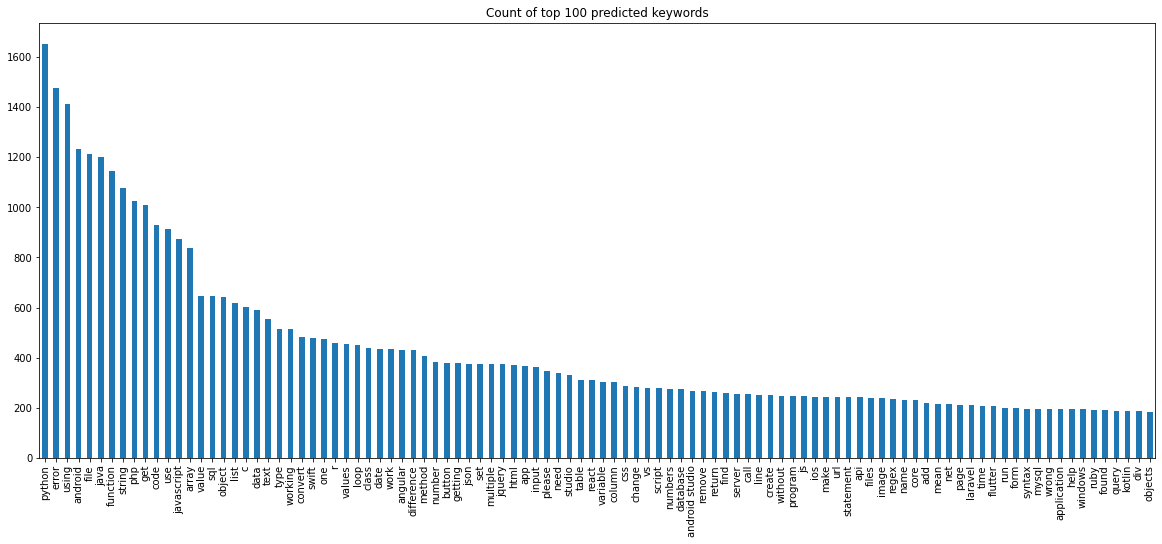

In [ ]:
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions', figsize=(20,8))

# 4. Lets configure the model 

You can configure the following parameters for YAKE : 

- setMinNGrams(int) Select the minimum length of a extracted keyword
- setMaxNGrams(int) Select the maximum length of a extracted keyword
- setNKeywords(int) Extract the top N keywords
- setStopWords(list) Set the list of stop words
- setThreshold(float) Each keyword will be given a keyword score greater than 0. (Lower the score better the keyword) Set an upper bound for the keyword score from this method.
- setWindowSize(int) Yake will construct a co-occurence matrix. You can set the - window size for the cooccurence matrix construction from this method. ex: - windowSize=2 will look at two words to both left and right of a candidate word.

In [ ]:
keyword_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['yake'] has settable params:
pipe['yake'].setMinNGrams(1)                         | Info: Minimum N-grams a keyword should have | Currently set to : 1
pipe['yake'].setMaxNGrams(3)                         | Info: Maximum N-grams a keyword should have | Currently set to : 3
pipe['yake'].setNKeywords(3)                         | Info: Number of Keywords to extract | Currently set to : 3
pipe['yake'].setWindowSize(3)                        | Info: Window size for Co-Occurrence | Currently set to : 3
pipe['yake'].setThreshold(-1.0)                      | Info: Keyword Score threshold | Currently set to : -1.0
pipe['yake'].setStopWords(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what

## 4.1 Lets configure the Yake model to give us 5 Keywords instead of 3

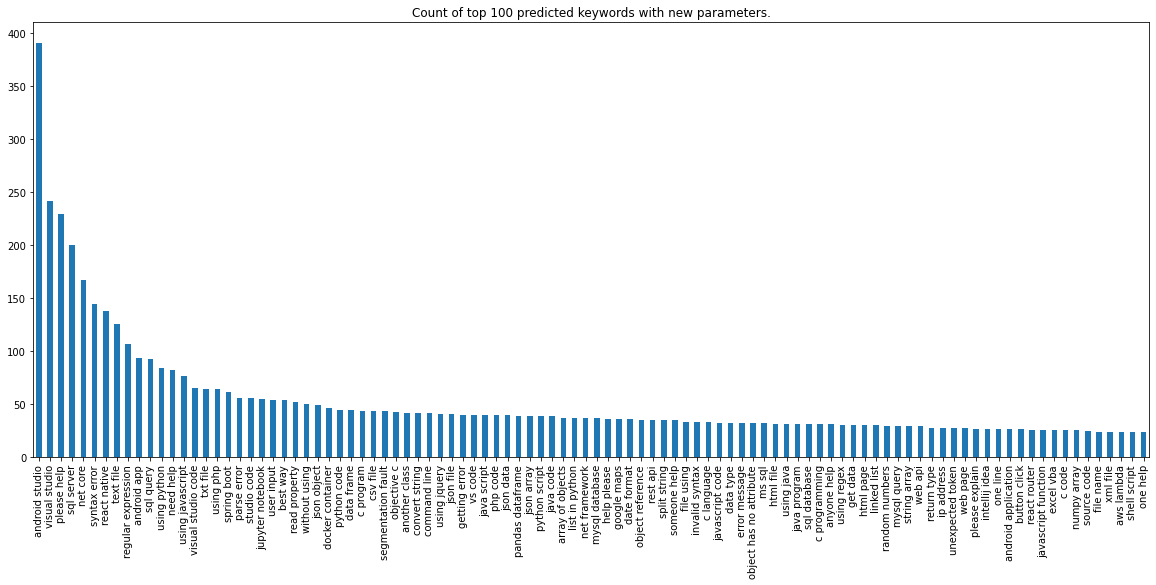

In [ ]:
keyword_pipe['yake'].setNKeywords(3) 
keyword_predictions = keyword_pipe.predict(df['Title'])
keyword_predictions
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Count of top 100 predicted keywords with new parameters.', figsize=(20,8))


## 4.2 Lets have some fun and play with YAKES parameters ad  configure min,max N gram and window size and see how our plot differs from before!

This is definetly fun and yields some interesting results.     

Have fun playing around!

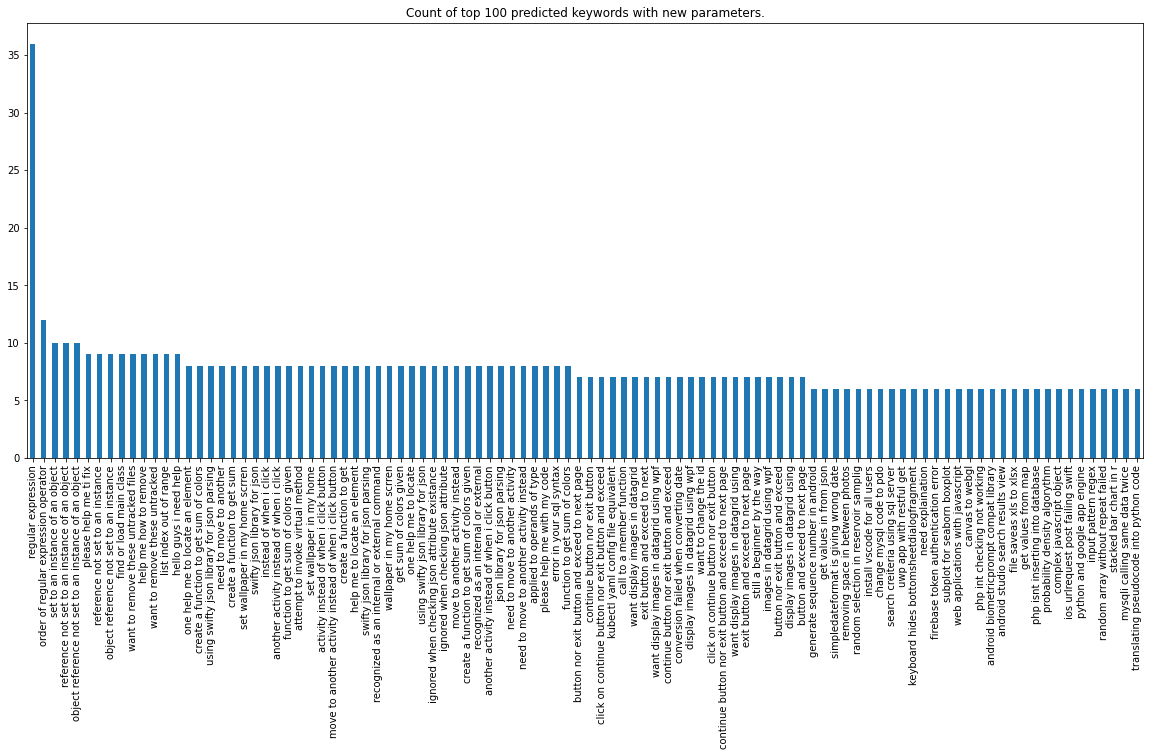

In [ ]:
keyword_pipe['yake'].setMinNGrams(5)   
keyword_pipe['yake'].setNKeywords(10) 
keyword_pipe['yake'].setMaxNGrams(10)  
keyword_pipe['yake'].setWindowSize(6)
keyword_predictions = keyword_pipe.predict(df['Title'])
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Count of top 100 predicted keywords with new parameters.', figsize=(20,8))


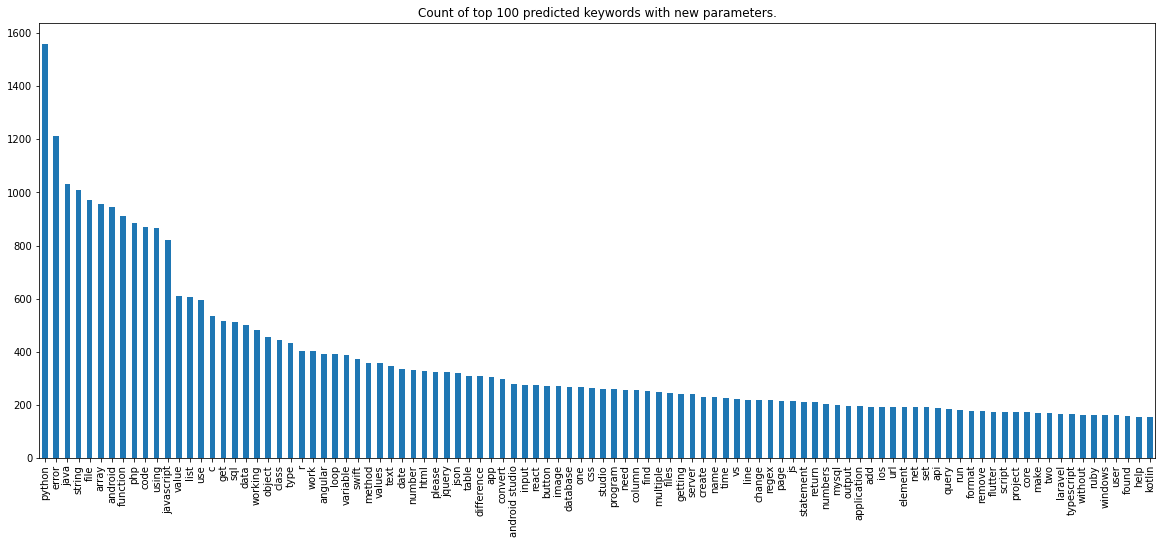

In [ ]:
keyword_pipe['yake'].setMinNGrams(1)   
keyword_pipe['yake'].setNKeywords(3) 
keyword_pipe['yake'].setMaxNGrams(5)  
keyword_pipe['yake'].setWindowSize(6)
keyword_predictions = keyword_pipe.predict(df['Title'])
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Count of top 100 predicted keywords with new parameters.', figsize=(20,8))


In [ ]:
nlu.load('yake').predict("NLU is a Python Library for beginners and experts in NLP")

,keywords_score_confidence,keywords,sentence
origin_index,,,
0,0.454232,"[nlu, nlp, python library]",NLU is a Python Library for beginners and expe...


In [ ]:
list(k)

[['nlu', 'nlp', 'python library']]